<a href="https://colab.research.google.com/github/Napawan2005/NLP-517432/blob/Test/NLP_EDA_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

660710086 นภัสวรรณ กอสินประเสริฐ

# EDA

***เนื้อหาเกี่ยวกับ Dataset***

&nbsp;&nbsp; ข้อมูลนี้เกี่ยวกับการริวิวของโรงแรมทั้งที่**เป็นความจริง หรือ ไม่เป็นความจริง** ***(Deceptive)***
ประกอบด้วย **20 โรงแรม** ในเมืองชิคาโก้ ซึ่งในริวิประกอบไปด้วย**ริวิวทางบวก และ ทางลบ**

**Dataset**<br>
&nbsp;&nbsp; ประกอบไปด้วย

- รีวิวเชิงบวกที่เป็นความจริง (Truthful positive reviews) จำนวน 400 รายการ จาก TripAdvisor

- รีวิวเชิงบวกที่เป็นเท็จ (Deceptive positive reviews) จำนวน 400 รายการ จาก Mechanical Turk

- รีวิวเชิงลบที่เป็นความจริง (Truthful negative reviews) จำนวน 400 รายการ จาก Expedia, Hotels.com, Orbitz, Priceline, TripAdvisor และ Yelp

- รีวิวเชิงลบที่เป็นเท็จ (Deceptive negative reviews) จำนวน 400 รายการ จาก Mechanical Turk

**รายชื่อโรงแรมที่รวมอยู่ในชุดข้อมูลนี้**

- *affinia*: Affinia Chicago (ปัจจุบันคือ MileNorth, A Chicago Hotel)

- *allegro*: Hotel Allegro Chicago - โรงแรมในเครือ Kimpton

- *amalfi*: Amalfi Hotel Chicago

- *ambassador*: Ambassador East Hotel (ปัจจุบันคือ PUBLIC Chicago)

- *conrad*: Conrad Chicago

- *fairmont*: Fairmont Chicago Millennium Park

- *hardrock*: Hard Rock Hotel Chicago

- *hilton*: Hilton Chicago

- *homewood*: Homewood Suites by Hilton Chicago Downtown

- *hyatt*: Hyatt Regency Chicago

- *intercontinental*: InterContinental Chicago

- *james*: James Chicago

- *knickerbocker*: Millennium Knickerbocker Hotel Chicago

- *monaco*: Hotel Monaco Chicago - โรงแรมในเครือ Kimpton

- *omni*: Omni Chicago Hotel

- *palmer*: The Palmer House Hilton

- *sheraton*: Sheraton Chicago Hotel and Towers

- *sofitel*: Sofitel Chicago Water Tower

- *swissotel*: Swissotel Chicago

- *talbott*: The Talbott Hotel

**อ้างอิงเนื้อหา Dataset นี้**
https://www.kaggle.com/datasets/rtatman/deceptive-opinion-spam-corpus



# การวิเคราะห์ข้อมูล
ข้อมูลของ [Deceptive Opinion Spam Corpus](https://www.kaggle.com/datasets/rtatman/deceptive-opinion-spam-corpus) เป็นข้อมูล public set เกี่ยวกับ **การริวิวโรงแรม** ที่รวบรวมหาว่าอันไหนเป็น**ริวิวจริงๆ(truthful)** หรือ **ริวิวปลอม(deceptive)**
แถมสามารถดูได้ว่าเป็นริวิวเชิง **ลบ(negative)** หรือ **บวก(positive)** อีกทั้งสามารถดูได้ว่ามาจากช่องทางไหน โดย Dataset เราจะประกอบด้วย
- MTurk (Amazon Mechanical Turk)
- TripAdvisor
- Web

<br>





## ข้อวังเกตุ Dataset นี้้ ⭐

- 🤖 สำรวจว่า **dataset** ของเรามีขนาดเท่าไหร่ ?
- 🪼 สำรวจว่าแต่ละ **column** เป็นข้อมูลประเภทอะไร ?
- 😶‍🌫️ตรวจสอบข้อมูลที่**ขาดหาย (missing values)**
- 😵‍💫 ตรวจสอบความ**ซ้ำซ้อนของข้อมูล (duplicate rows)**

- 📊 จำนวนข้อมูล**แต่ละ column**เป็นลักษณะยังไง?

- 🔎สำรวจความข้อมูล**ริวิวปลอมๆเป็นลักษณะยังไง**?

- ข้อมูล **Target** ของเรา**มีความถี่**แต่ละ column ยังไง ?

-

<br>

---

## 🧲 นำ **Dataset** จาก kaggle ดึงเข้ามา


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtatman/deceptive-opinion-spam-corpus")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'deceptive-opinion-spam-corpus' dataset.
Path to dataset files: /kaggle/input/deceptive-opinion-spam-corpus


The cell `D_o-QgNppvYc` downloads the dataset from Kaggle. The `kagglehub.dataset_download` function returns the path to the downloaded dataset files. You can then use this path to load the data into a pandas DataFrame.

In [ ]:
import pandas as pd
import os

# Assuming the downloaded dataset contains a CSV file, you would typically find it within the downloaded path.
# Let's list the files in the downloaded directory to find the CSV.

# Adjust this based on the actual file name if different.
# For example, if the path contains a folder, you might need to join the folder path with the CSV file name.

dataset_files = os.listdir(path)
print(f"Files in the downloaded dataset directory: {dataset_files}")

# Assuming there's a CSV file in the root of the downloaded folder, or you know its name.
# Replace 'your_dataset_file.csv' with the actual name of the CSV file if you know it.
# As an example, let's try to find the first .csv file in the directory.
csv_file = None
for file_name in dataset_files:
    if file_name.endswith('.csv'):
        csv_file = file_name
        break

if csv_file:
    full_file_path = os.path.join(path, csv_file)
    print(f"Loading data from: {full_file_path}")
    df = pd.read_csv(full_file_path)
    display(df.head())
else:
    print("No CSV file found in the downloaded dataset directory. Please check the contents of the path variable.")

Files in the downloaded dataset directory: ['deceptive-opinion.csv']
Loading data from: /kaggle/input/deceptive-opinion-spam-corpus/deceptive-opinion.csv


,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


# check total messages

In [ ]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


check missing values

In [ ]:
df.isnull().sum()

,0
deceptive,0
hotel,0
polarity,0
source,0
text,0


check duplicated in dataset

In [ ]:
df.duplicated().sum()

np.int64(4)

drop_duplicates

In [ ]:
df.drop_duplicates(inplace=True)

check duplicates again

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.groupby('deceptive').size()

,0
deceptive,
deceptive,800
truthful,796


In [ ]:
df.groupby('hotel').size()

,0
hotel,
affinia,79
allegro,80
amalfi,80
ambassador,80
conrad,80
fairmont,80
hardrock,80
hilton,80
homewood,80


In [ ]:
df.groupby('polarity').size()

,0
polarity,
negative,796
positive,800


In [ ]:

df.groupby('source').size()

,0
source,
MTurk,800
TripAdvisor,400
Web,396


In [ ]:

df.groupby('text').size()


,0
text,
"I stayed at the Sheraton Chicago Hotel and Towers a couple nights ago. The service was excellent!! As soon as i stepped through the door they grabbed my bags, and were helping me choose the best hotel room for me! I loved there service and the room was gorgeous! I highly recommend it for anyone, and there prices aren't as bad as others. I loved the experience and I'm sure next time I'm in the area I'll visit again!\n",1
"If you are traveling anywhere near Lake Michigan within the next year or less, I would highly recommend staying at The Sofitel Hotel. Unbeatable elegance, fine dining, and magnificent views are only just a few amenities to speak of. Along with excellent service and reasonable pricing you will be assured to get a quality nights rest. If there were such a thing as a 10 star rating, The Sofitel would surely have it. My visit and stay there was nothing short of elegance and comfort. Located minutes from everything in downtown Chicago, one would hardly want to leave. Fine dining, dancing, and an evening bar will leave you absolutely relaxing after any meeting, or social event in town. The Sofitel Hotel will leave you wanting to visit the moment you leave.\n",1
"If you are traveling to Chicago and need a place to stay, I highly recommend the Hotel Allegro Chicago. It was visiting time visiting Chicago for the first time on a business trip and a friend referred me to the Hotel Allegro. He said they were pet friendly,which was a huge plus. This is because I hate leaving my kitten muffin with a pet sitter every time I travel for business. Upon my arrival, I was met with friendly valet who treated me like I was the only customer who mattered. I walked in and saw a hotel like no other I have seen before or after. The lobby was decorated with modern furniture and paintings and looked like a place I could relax in. After I had entered and checked in, I saw the staircase, which looked like a testament to the staircase in the 'Titanic'. Frankly, I was amazed and I had not even entered my room yet. My room was a Queen Deluxe room and it was amazing. The bed had a blue headboard,which I have never seen before, and the colors worked together so well I seriously contemplated living there. The room service was exceptional and promptly brought the food I ordered. Later I wanted to get a drink and I enjoyed it at The Bar 312, which is conveniently located adjacent to the hotel. These are the specifics of my stay, but there is much more to be experienced that I did not mention if you visit the Hotel Allegro. In summary, they allow pets, the service is amazing, the decoration superb, and it is conveniently situated next to dining establishments. What more could a person ask for?\n",1
"My wife and I's stay at the Sheraton Chicago Hotel and Towers proved to be the perfect complement to our time spent visiting and exploring the Windy City. Upon our arrival, we were immediately welcomed by the beautiful design of the first-floor lobby and the friendly demeanor of the desk and bell service staff. In seemingly no time at all we were in our clean and well-furnished room with a beautiful and peaceful view of Lake Michigan. In terms of accommodations, I have never personally stayed at a hotel that I could complement more. On our very first night, my wife took advantage of a message therapy session while I swam a few laps in the heated indoor swimming pool. We followed our time apart with a very relaxing time at the Chi bar, which had a very enlivening and laid-back atmosphere. Retiring to our rooms, I couldn't help but remark to my wife about the quality of our room and the bed in particular. I had a very comfortable night's sleep and woke up just on time thanks to a spot-on wake up call from the desk staff. After a quick bite to eat the LB Bistro, we headed out to sight-see. Overall, I can't recommend the Sheraton Chicago Hotel and Towers enough. As far as this customer is concerned, it is the only place to stay if you are in the C

## 📊 สำรวจว่า **dataset** ของเรามีขนาดเท่าไหร่ ?

In [ ]:
df.shape

(1596, 5)



---



## 📊 สำรวจว่าแต่ละ **column** เป็นข้อมูลประเภทอะไร ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1596 non-null   object
 1   hotel      1596 non-null   object
 2   polarity   1596 non-null   object
 3   source     1596 non-null   object
 4   text       1596 non-null   object
dtypes: object(5)
memory usage: 74.8+ KB




---

## สำรวจข้อมูลที่เป็น **text** หรือ **เป้าหมายในการทำงาน** เป็น **string** ไหม ถ้าไม่จะมีวิธีการแก้ไขยังไง ?



In [ ]:
print("ประเภทข้อมูลเดิมของ 'text' column:", df['text'].dtype)
df['text'] = df['text'].astype('string')
print("ประเภทข้อมูลใหม่ของ 'text' column:", df['text'].dtype)


ประเภทข้อมูลเดิมของ 'text' column: object
ประเภทข้อมูลใหม่ของ 'text' column: string


### เช็คข้อมูลทั้งหมดว่าออกเป็นตามที่หวังไหม ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1596 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1596 non-null   object
 1   hotel      1596 non-null   object
 2   polarity   1596 non-null   object
 3   source     1596 non-null   object
 4   text       1596 non-null   string
dtypes: object(4), string(1)
memory usage: 74.8+ KB


## สำรวจ **ว่ามีจำนวนคำใน column** เป็นจำนวนเท่าไหร่ ?

In [ ]:
df['Count - text'] = df['text'].str.split().str.len()
df.head()

,deceptive,hotel,polarity,source,text,Count - text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...,105
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...,45
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...,207
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...,127
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...,72


> **Note**
  ~ อธิบายโค้ด:

`.astype(str): `แปลงให้แน่ใจว่าเป็นตัวอักษร (กันเหนียวไว้ก่อน)

`.str.split(): `สั่งตัดข้อความเมื่อเจอ "ช่องว่าง" (Space) ให้กลายเป็น List ของคำ

`.str.len(): `สั่งนับจำนวนสมาชิกใน List นั้น (นั่นคือจำนวนคำ)



---



#### มี 4 column

แต่ละ column

> ⛪ เป็นข้อมูลประเภท **object**

### **deceptive**

In [ ]:
df['deceptive'].unique()

array(['truthful', 'deceptive'], dtype=object)

- truthful = คนริวิวแน่นอน หรือ ริวิวโดยของแท้ไม่เฟสนิว
- deceptive = ริวิวปลอม สแปมแน่นอย

### สร้างกราฟ

/tmp/ipython-input-2843619072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'deceptive', data = df, palette='viridis')


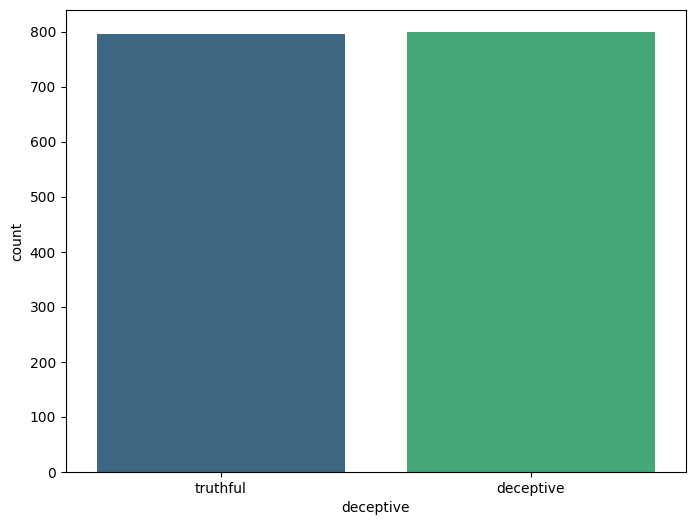

In [ ]:
fig = plt.figure(figsize = (8,6))
sns.countplot(x = 'deceptive', data = df, palette='viridis')
plt.grid(False)
plt.show('count')
plt.show()